<a href="https://colab.research.google.com/github/FastabiqilKhairani/Machine-Learning-Course-Telkom-University/blob/main/Week_7_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn import ensemble

In [9]:
# Load data

boston = datasets.load_boston()

print(boston.data.shape, boston.target.shape)

print(boston.feature_names)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [10]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)

data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Select the predictor and target variables**

In [11]:
X = data.iloc[:,:-1]

y = data.iloc[:,-1]

**Train test split**

In [12]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10,

random_state=42,

shuffle=True)

**Training**

In [13]:
# Fit regression model

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,

'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)

model.fit(x_training_set, y_training_set)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=4,
                          n_estimators=500)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

model_score = model.score(x_training_set,y_training_set)

# Have a look at R sq to give an idea of the fit ,

# Explained variance score: 1 is perfect prediction

print('R2 sq: ',model_score)

y_predicted = model.predict(x_test_set)


# The mean squared error

print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))

# Explained variance score: 1 is perfect prediction

print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

R2 sq:  0.9800347273281852
Mean squared error: 5.87
Test Variance score: 0.91


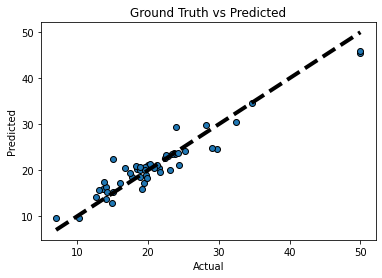

In [15]:
# So let's run the model against the test data

from sklearn.model_selection import cross_val_predict


fig, ax = plt.subplots()

ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))

ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Ground Truth vs Predicted")

plt.show()

Source : https://www.24tutorials.com/machine-learning/xgboost-for-regression/